In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [2]:
import warnings
warnings.filterwarnings("ignore")

## DATABASE 1

In [3]:
df_client_profiles = pd.read_csv("df_final_demo.txt")
df_client_profiles.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
#CELANING AND ORGANIZING THE DATASET

In [5]:
df_client_profiles = df_client_profiles[df_client_profiles['gendr'] != 'X']

In [6]:
df_client_profiles.dropna(subset=['clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'], inplace=True)

In [7]:
# Convert columns to integers
df_client_profiles['clnt_age'] = df_client_profiles['clnt_age'].astype(int)
df_client_profiles['calls_6_mnth'] = df_client_profiles['calls_6_mnth'].astype(int)
df_client_profiles['logons_6_mnth'] = df_client_profiles['logons_6_mnth'].astype(int)
df_client_profiles['clnt_tenure_mnth'] = df_client_profiles['clnt_tenure_mnth'].astype(int)
df_client_profiles['num_accts'] = df_client_profiles['num_accts'].astype(int)

In [8]:
df_cp_numerical = df_client_profiles.select_dtypes("number").columns
df_cp_numerical

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [9]:
df_cp_categorical = df_client_profiles.select_dtypes("object").columns
df_cp_categorical

Index(['gendr'], dtype='object')

In [10]:
potential_categorical_from_numerical = df_client_profiles.select_dtypes("number").loc[:, df_client_profiles.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,num_accts,calls_6_mnth,logons_6_mnth
0,2,6,9
1,2,6,9
2,2,6,9
3,2,3,6
4,2,0,3
...,...,...,...
70604,3,5,5
70605,2,6,6
70606,2,3,3
70607,3,4,4


We can see there are no potential numerical for categorical categories in this dataset.

In [11]:
df_client_profiles.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70591
bal                 70324
clnt_tenure_mnth      482
clnt_age               84
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [12]:
# PRIMARY CLIENTS:

In [13]:
(19/70591)*100

0.02691561247184485

In [14]:
threshold_balance = df_client_profiles['bal'].quantile(0.8)
primary_clients = df_client_profiles[df_client_profiles['bal'] > threshold_balance]
primary_clients.nunique()
## (14118/70591)*100= 20%
primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
7,388801,30.0,361,57,M,5,522498.72,1,4
8,285619,30.0,369,67,M,2,299388.72,3,6
9,8198645,15.0,189,54,F,2,382303.83,6,9
21,6590646,8.0,103,42,F,3,2768726.87,5,8
26,9381346,7.0,88,62,U,2,272252.76,0,3
...,...,...,...,...,...,...,...,...,...
70593,7217125,14.0,178,58,U,2,319382.04,5,6
70595,1196936,15.0,184,45,F,2,482000.12,1,1
70598,7807844,5.0,70,37,U,2,493497.05,2,2
70604,7993686,4.0,56,38,U,3,1411062.68,5,5


In [15]:
primary_clients.to_csv("primary_clients.csv", index=False)

In [16]:
# PRIMARY TOP CLIENTS
threshold_balance = df_client_profiles['bal'].quantile(0.95)
primary_top_clients = df_client_profiles[df_client_profiles['bal'] > threshold_balance]
primary_top_clients.nunique()
## (3530/70591)*100 = 5%

client_id           3530
clnt_tenure_yr        48
clnt_tenure_mnth     418
clnt_age              72
gendr                  3
num_accts              6
bal                 3530
calls_6_mnth           8
logons_6_mnth          9
dtype: int64

In [17]:
#Comparing ages and tenures:
average_age = df_client_profiles['clnt_age'].mean()
average_tenure = df_client_profiles['clnt_tenure_mnth'].mean()

average_age_primary = primary_clients['clnt_age'].mean()
average_tenure_primary = primary_clients['clnt_tenure_mnth'].mean()

print(f"Average Age of All Clients: {average_age:.2f}, while Average Age of Primary Clients: {average_age_primary:.2f}")
print(f"Average Tenure of All Clients: {average_tenure:.2f} months, while Average Tenure of Primary Clients: {average_tenure_primary:.2f} months")

Average Age of All Clients: 46.18, while Average Age of Primary Clients: 55.13
Average Tenure of All Clients: 150.66 months, while Average Tenure of Primary Clients: 187.79 months


In [18]:
#Age: Compare ages to see if primary clients tend to be older or younger.
#Tenure: Compare tenures to determine if primary clients are newer or have been with you longer.

In [19]:
# Categorize age
primary_clients['age_group'] = pd.cut(primary_clients['clnt_age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Old'])

# Categorize tenure
primary_clients['tenure_group'] = pd.cut(primary_clients['clnt_tenure_yr'], bins=[0, 5, 10, 21], labels=['New', 'Mid-term', 'Long-standing'])

In [20]:
primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group,tenure_group
7,388801,30.0,361,57,M,5,522498.72,1,4,Old,NaN
8,285619,30.0,369,67,M,2,299388.72,3,6,Old,NaN
9,8198645,15.0,189,54,F,2,382303.83,6,9,Old,Long-standing
21,6590646,8.0,103,42,F,3,2768726.87,5,8,Middle-aged,Mid-term
26,9381346,7.0,88,62,U,2,272252.76,0,3,Old,Mid-term
...,...,...,...,...,...,...,...,...,...,...,...
70593,7217125,14.0,178,58,U,2,319382.04,5,6,Old,Long-standing
70595,1196936,15.0,184,45,F,2,482000.12,1,1,Middle-aged,Long-standing
70598,7807844,5.0,70,37,U,2,493497.05,2,2,Middle-aged,New
70604,7993686,4.0,56,38,U,3,1411062.68,5,5,Middle-aged,New


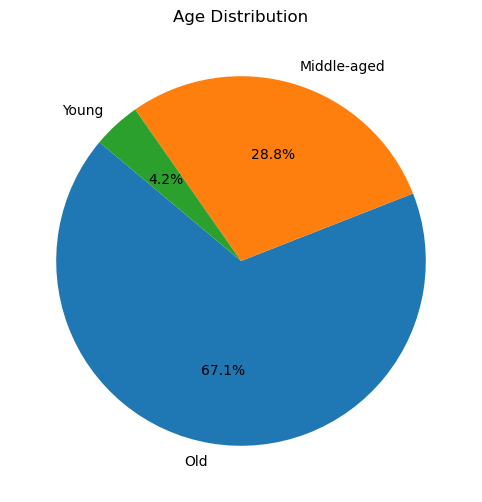

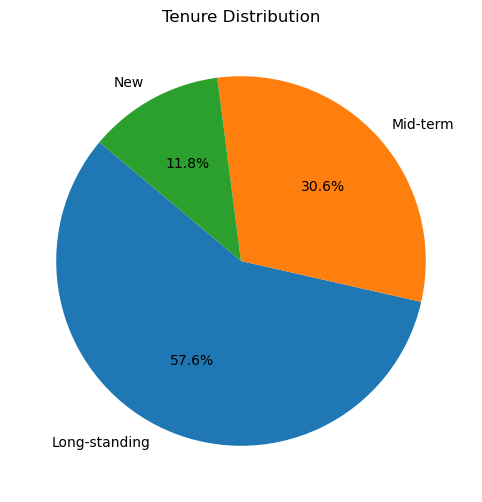

In [21]:
# Pie chart for age distribution of primary clients:
age_distribution = primary_clients['age_group'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')
plt.show()

# Pie chart for tenure distribution of primary clients:
tenure_distribution = primary_clients['tenure_group'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(tenure_distribution, labels=tenure_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Tenure Distribution')
plt.show()

In [22]:
# Group by gender and age category, then count the number of clients
gender_age_distribution = primary_clients.groupby(['gendr', 'age_group'])['client_id'].count().unstack()
gender_age_distribution

age_group,Young,Middle-aged,Old
gendr,,,
F,109,1182,3070
M,270,2007,4617
U,212,870,1781


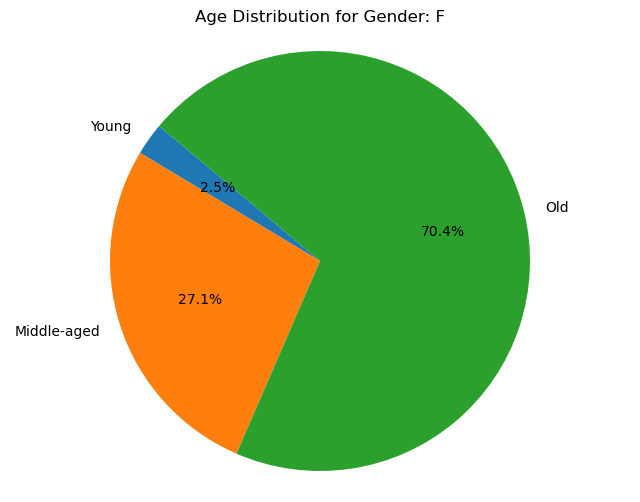

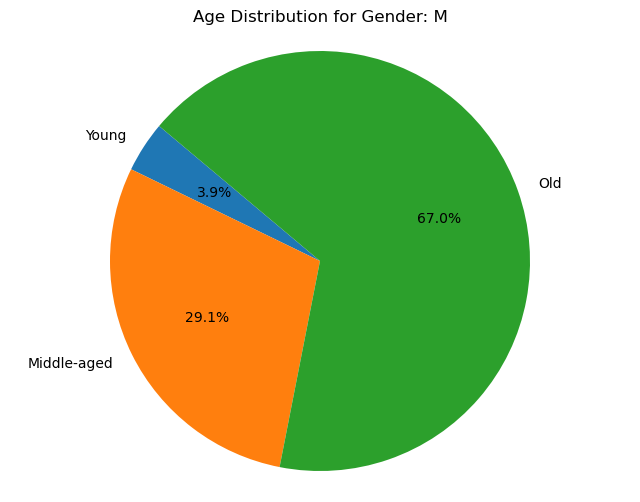

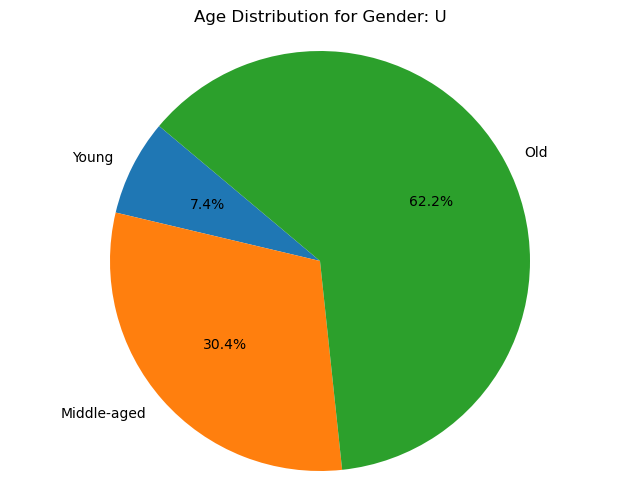

In [23]:
for gender in gender_age_distribution.index:
    age_counts = gender_age_distribution.loc[gender].dropna()  # Drop any NaN values

    # Plot pie chart for each gender
    plt.figure(figsize=(8, 6))
    plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Age Distribution for Gender: {gender}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [24]:
#Logons based on gender & age of primary clients:
average_logons = primary_clients.groupby(['age_group', 'gendr'])['logons_6_mnth'].mean().reset_index()
logons_per_age_gender = average_logons.pivot(index='age_group', columns='gendr', values='logons_6_mnth')
logons_per_age_gender

gendr,F,M,U
age_group,,,
Young,5.633028,6.744444,6.811321
Middle-aged,5.906091,6.560040,6.232184
Old,6.287622,6.777994,6.523302


In [25]:
#Calls based on gender & age of primary clients:
average_calls = primary_clients.groupby(['age_group', 'gendr'])['calls_6_mnth'].mean().reset_index()
calls_per_age_gender = average_calls.pivot(index='age_group', columns='gendr', values='calls_6_mnth')
calls_per_age_gender

gendr,F,M,U
age_group,,,
Young,3.899083,4.892593,4.801887
Middle-aged,3.829949,4.408072,4.129885
Old,3.976221,4.497076,4.206625


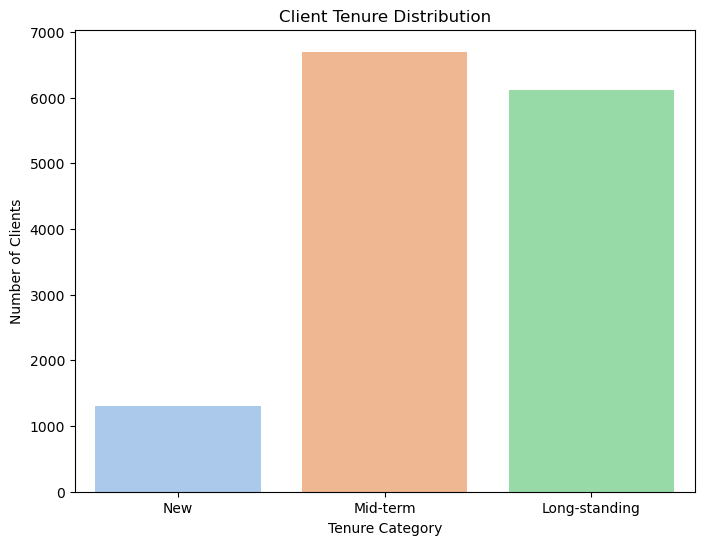

In [26]:
# Categorize tenure based on primary clients 
primary_clients['tenure_category'] = pd.cut(primary_clients['clnt_tenure_yr'],bins=[0, 5, 15, float('inf')],labels=['New', 'Mid-term', 'Long-standing'])
tenure_counts = primary_clients['tenure_category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='pastel')
plt.xlabel('Tenure Category')
plt.ylabel('Number of Clients')
plt.title('Client Tenure Distribution')
plt.show()

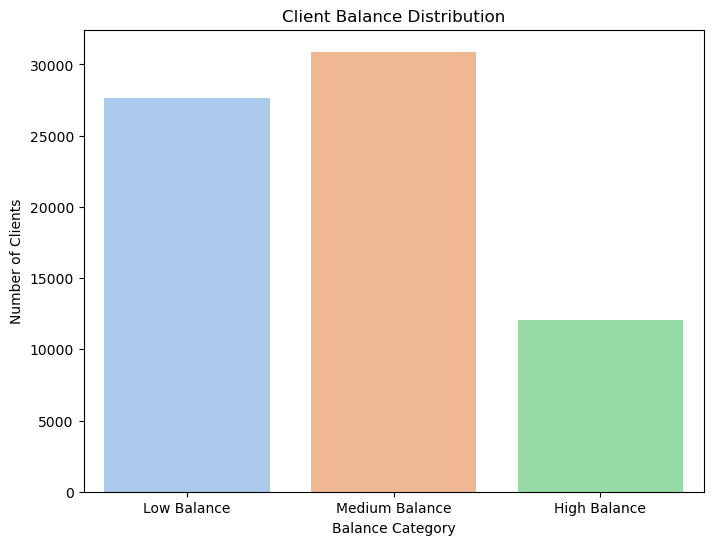

In [27]:
# Categorize balance based on primary clients
df_client_profiles['balance_category'] = pd.cut(df_client_profiles['bal'], bins=[0, 50000, 200000, float('inf')],labels=['Low Balance', 'Medium Balance', 'High Balance'])
balance_counts = df_client_profiles['balance_category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=balance_counts.index, y=balance_counts.values, palette='pastel')
plt.xlabel('Balance Category')
plt.ylabel('Number of Clients')
plt.title('Client Balance Distribution')
plt.show()

In [28]:
#Client behaviour understanding

In [29]:
primary_summary = primary_clients.groupby('age_group').agg(
    average_logons=('logons_6_mnth', 'mean'),
    average_accounts=('num_accts', 'mean'),
    count=('client_id', 'count')
).reset_index()

primary_summary

,age_group,average_logons,average_accounts,count
0,Young,6.563452,2.869712,591
1,Middle-aged,6.299335,2.666667,4059
2,Old,6.571082,2.498733,9468


## DATABASE 2

In [30]:
df1 = pd.read_csv("df_final_web_data_pt_1.txt")

In [31]:
df2 = pd.read_csv("df_final_web_data_pt_2.txt")

In [32]:
df_digital_footprints = pd.concat([df1, df2])

In [33]:
df_digital_footprints.shape

(755405, 5)

In [38]:
merged_df = df_experiment.merge(df_digital_footprints, on='client_id', how='inner')
merged_df

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
449826,9895983,Test,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09
449827,9895983,Test,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37
449828,9895983,Test,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05
449829,9895983,Test,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00


In [39]:
#CONTROL COMPLETION RATE
completion_step = "confirm"

control_group = merged_df[merged_df['Variation'] == 'Control']
control_completed_clients = control_group[control_group['process_step'] == completion_step]['client_id'].nunique()
control_total_clients = control_group['client_id'].nunique()
control_completion_rate = (control_completed_clients / control_total_clients)*100
print(f"The completion rate for the control group is {control_completion_rate:.2f}%")

The completion rate for the control group is 65.59%


In [40]:
#TEST COMPLETION RATE

test_group = merged_df[merged_df['Variation'] == 'Test']
test_completed_clients = test_group[test_group['process_step'] == completion_step]['client_id'].nunique()
test_total_clients = test_group['client_id'].nunique()
test_completion_rate = (test_completed_clients / test_total_clients)*100
print(f"The completion rate for the test group is {test_completion_rate:.2f}%")

The completion rate for the test group is 68.75%


Average Time Spent on Each Step for the Control Group:
process_step
confirm     13.98
start      105.19
step_1      72.80
step_2      61.09
step_3      48.24
Name: duration, dtype: float64


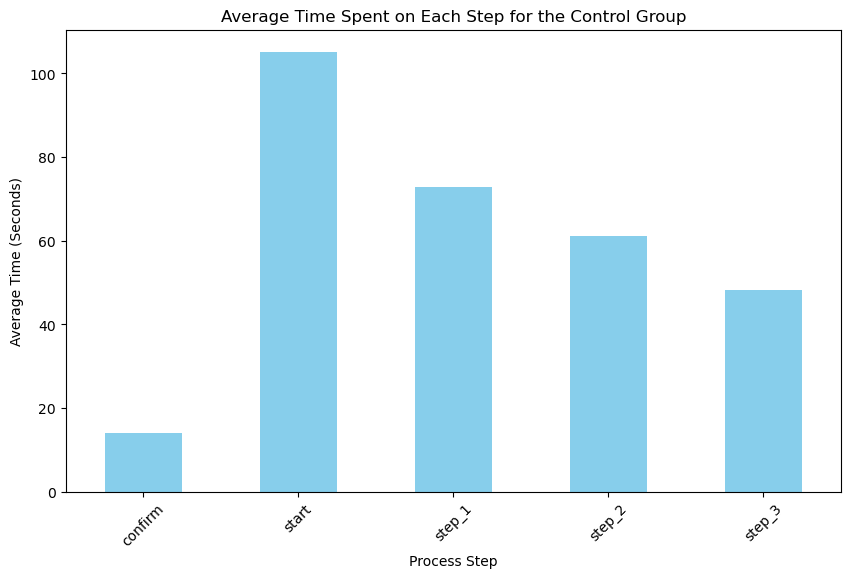

In [41]:
#TIME SPENT ON EACH STEP FOR THE CONTROL GROUP

control_group['date_time'] = pd.to_datetime(control_group['date_time'])
step_times_control = control_group.groupby(['visitor_id', 'visit_id', 'process_step'])['date_time'].agg(['min', 'max']).reset_index()
step_times_control['duration'] = (step_times_control['max'] - step_times_control['min']).dt.seconds
avg_time_per_step_control = step_times_control.groupby('process_step')['duration'].mean().round(2)
print("Average Time Spent on Each Step for the Control Group:")
print(avg_time_per_step_control)

plt.figure(figsize=(10, 6))
avg_time_per_step_control.plot(kind='bar', color='skyblue')
plt.title('Average Time Spent on Each Step for the Control Group')
plt.xlabel('Process Step')
plt.ylabel('Average Time (Seconds)')
plt.xticks(rotation=45)
plt.show()

Average Time Spent on Each Step for the Test Group:
process_step
confirm     40.47
start      137.63
step_1      98.86
step_2      69.18
step_3      54.63
Name: duration, dtype: float64


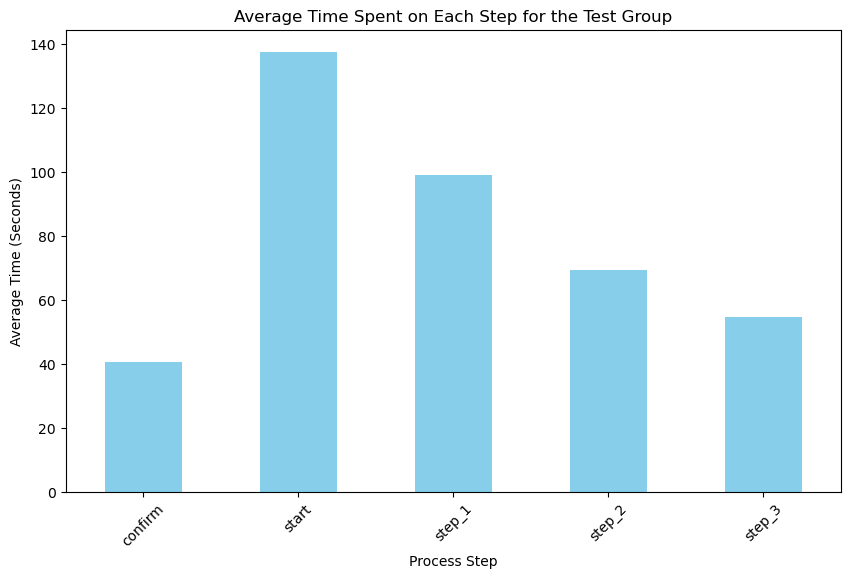

In [42]:
#TIME SPENT ON EACH STEP FOR THE TEST GROUP

test_group['date_time'] = pd.to_datetime(test_group['date_time'])
step_times_test = test_group.groupby(['visitor_id', 'visit_id', 'process_step'])['date_time'].agg(['min', 'max']).reset_index()
step_times_test['duration'] = (step_times_test['max'] - step_times_test['min']).dt.seconds
avg_time_per_step_test = step_times_test.groupby('process_step')['duration'].mean().round(2)
print("Average Time Spent on Each Step for the Test Group:")
print(avg_time_per_step_test)

plt.figure(figsize=(10, 6))
avg_time_per_step_test.plot(kind='bar', color='skyblue')
plt.title('Average Time Spent on Each Step for the Test Group')
plt.xlabel('Process Step')
plt.ylabel('Average Time (Seconds)')
plt.xticks(rotation=45)
plt.show()

In [43]:
#ERROR RATE FOR CONTROL GROUP

total_visitors_control = control_group["visitor_id"].nunique()
error_events_control = control_group[control_group['process_step'].shift(1) > control_group['process_step']]
error_rate_control = (error_events_control['visitor_id'].nunique() / total_visitors_control)

print(f"Error Rate for the Control Group: {error_rate_control * 100:.2f}%")

Error Rate for the Control Group: 82.13%


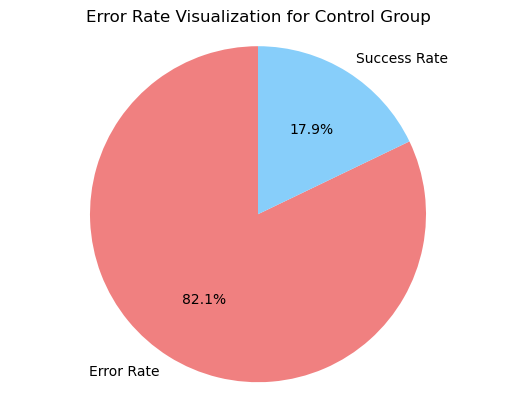

In [44]:
error_rates = [error_rate_control, 1-error_rate_control]
labels = ['Error Rate', 'Success Rate']

fig1, ax1 = plt.subplots()
ax1.pie(error_rates, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
ax1.axis('equal')  
plt.title('Error Rate Visualization for Control Group')
plt.show()

In [45]:
#ERROR RATE FOR TEST GROUP
total_visitors_test = test_group["visitor_id"].nunique()
error_events_test = test_group[test_group['process_step'].shift(1) > test_group['process_step']]
error_rate_test = (error_events_test['visitor_id'].nunique() / total_visitors_test)

print(f"Error Rate for the Test Group: {error_rate_test * 100:.2f}%")

Error Rate for the Test Group: 87.25%


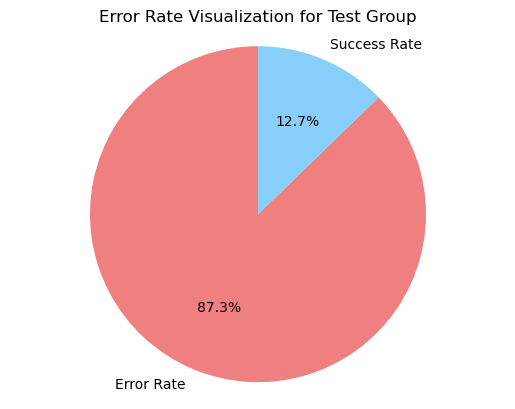

In [46]:
error_rates = [error_rate_test, 1-error_rate_test]
labels = ['Error Rate', 'Success Rate']

fig1, ax1 = plt.subplots()
ax1.pie(error_rates, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
ax1.axis('equal')  
plt.title('Error Rate Visualization for Test Group')
plt.show()

## Comparisons

In [47]:
difference_completion_rates = test_completion_rate - control_completion_rate
print(f"The difference in completion rates is: {difference_completion_rates:.2f}%")

if difference_completion_rates > 0:
    print("Test group has a higher completion rate.")
elif difference_completion_rates < 0:
    print("Control group has a higher completion rate.")
else:
    print("Both groups have the same completion rate.")

The difference in completion rates is: 3.16%
Test group has a higher completion rate.


The completion rate has slightly increased with the test variation(new design). This suggests a minor improvement in guiding users to complete the process.

The high error rate across both variations might indicate user frustration or significant barriers in the process. 

Users are spending more time on all steps in the new design. This could indicate that this variation might be less intuitive or requires more user decision-making or interaction time. If the goal is to make the process quick, this is a downside.

## Testing hypothesis

COMPLETION RATE

In [48]:
#H0: completion_rate_control(old)=completion_rate_test(new)
#H1: completion_rate_control != completion_rate_test

In [49]:
successes = np.array([control_completed_clients, test_completed_clients])
totals = np.array([control_total_clients, test_total_clients])

test_sample, p_value = proportions_ztest(successes, totals)
print(f"test_sample: {test_sample}, p_value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("We reject the null hypothesis, indicating a significant difference between the two completion rates.")
else:
    print("We fail to reject the null hypothesis, as there is no significant difference between the two completion rates.")

test_sample: -8.474631345737725, p_value: 2.3582512961040943e-17
We reject the null hypothesis, indicating a significant difference between the two completion rates.


COMPLETION RATE WITH A COST-EFFECTIVENESS THRESHOLD (+5%)

In [50]:
#H0: completion rate test <= leq completion rate control + 5%
#H1: completion rate test > completion rate control+ 5%

In [51]:
control_completion_rate
minimum_increase = 0.05

test_stat, p_value = proportions_ztest(successes, totals, alternative='larger', value=control_completion_rate + minimum_increase)
print(f"test_sample: {test_sample}, p_value: {p_value}")


alpha = 0.05  
if p_value < alpha:
    print("The test group meets the minimum 5% increase threshold, justifying the cost of the new design.")
else:
    print("The test group does not meet the minimum 5% increase threshold.")

test_sample: -8.474631345737725, p_value: 1.0
The test group does not meet the minimum 5% increase threshold.


HYPOTHESIS TESTING BETWEEN CLIENTS AVERAGEG AGE AND STEP PROCESS

In [52]:
#H0: Gender and completion rates are independent.
#H1: Gender and completion rates are not independent.

In [53]:
full_df = merged_df.merge(df_client_profiles, on='client_id', how='inner')

In [54]:
completion_step = 'confirm'  

completed_df = full_df[full_df['process_step'] == completion_step]

completion_rates = completed_df.groupby(['gendr', 'Variation']).agg({
    'client_id': 'nunique'
}).rename(columns={'client_id': 'completed_clients'})

total_visits = full_df.groupby(['gendr', 'Variation']).agg({
    'client_id': 'nunique'
}).rename(columns={'client_id': 'total_clients'})

completion_rates = completion_rates.join(total_visits)
completion_rates['completion_rate'] = completion_rates['completed_clients'] / completion_rates['total_clients']

In [57]:
contingency_table = pd.crosstab(full_df['gendr'], full_df['Variation'], margins=False)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Statistic: {chi2}, P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("we can reject the null hypothesis that claimed gender and completion rates were independent!.")
else:
    print("No significant difference in engagement across genders and variations.")

Chi-squared Statistic: 56.97809495406097, P-value: 4.2399807616721956e-13
we can reject the null hypothesis that claimed gender and completion rates were independent!.


CHECKING IF DATA IS NORMALLY DISTRIBUTED

<Axes: xlabel='clnt_age', ylabel='Count'>

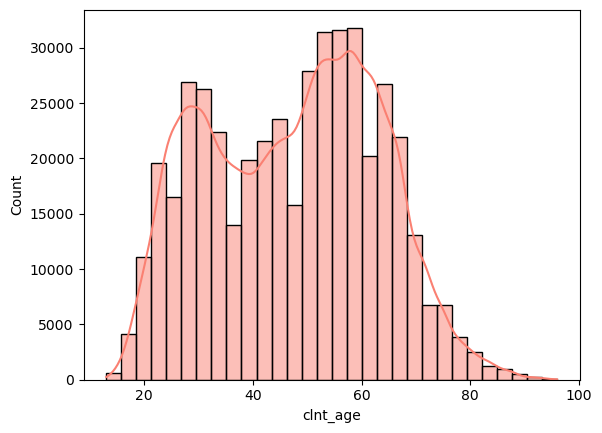

In [58]:
sns.histplot(full_df['clnt_age'], kde=True, bins=30, color="salmon")

HYPOTHESIS TESTING

In [59]:
std_age = st.zscore(full_df["clnt_age"], nan_policy="omit")

In [60]:
#standardized_age = (full_df['clnt_age'] - full_df['clnt_age'].mean()) / full_df['clnt_age'].std()
ks_test_statistic, ks_p_value = st.kstest(std_age, 'norm')

print(ks_test_statistic, ks_p_value)
if ks_p_value < 0.05:
    print('The test results indicate that the distribution is significantly different from a normal distribution, REJECT Ho.')
else:
    print('The test results indicate that the distribution is not significantly different from a normal distribution.')

0.07001292447804863 0.0
The test results indicate that the distribution is significantly different from a normal distribution, REJECT Ho.


TRANSFORMING TO NORMAL DISTRIBUTION

Text(0.5, 1.0, 'Square Root Transformed client age')

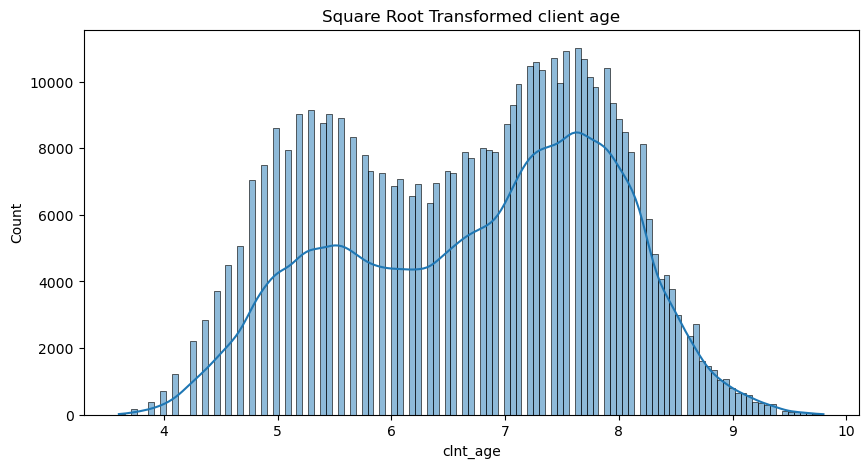

In [61]:
sqr_clnt_age = np.sqrt(full_df['clnt_age'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Square Root transformed '1stFlrSF'
sns.histplot(sqr_clnt_age, kde=True)
plt.title('Square Root Transformed client age')

AFTER TRANSFORMATION

<Axes: xlabel='clnt_age', ylabel='Count'>

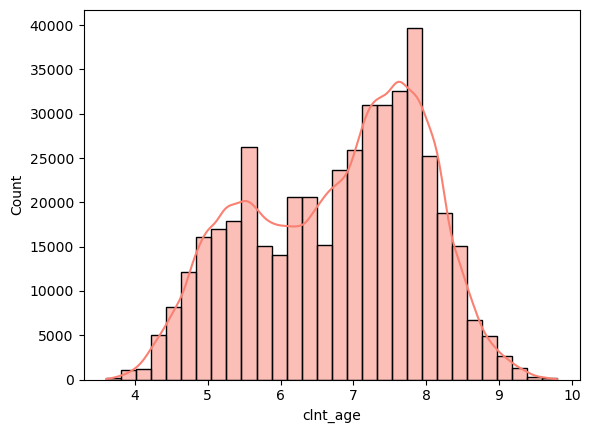

In [62]:
sns.histplot(sqr_clnt_age, kde=True, bins=30, color="salmon")

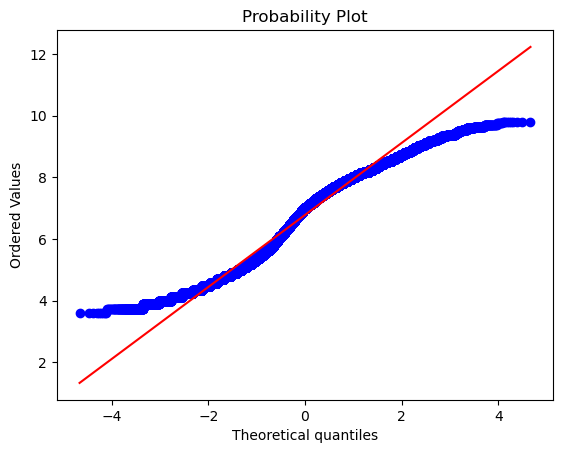

In [64]:
st.probplot(sqr_clnt_age, plot=plt);

In [65]:
ks_test_statistic, ks_p_value = st.kstest(sqr_clnt_age, 'norm')

print(ks_test_statistic, ks_p_value)
if ks_p_value < 0.05:
    print('The test results indicate that the distribution is significantly different from a normal distribution, REJECT Ho.')
else:
    print('The test results indicate that the distribution is not significantly different from a normal distribution.')

0.9998885808962334 0.0
The test results indicate that the distribution is significantly different from a normal distribution, REJECT Ho.


## DATABASE 3

In [35]:
df_experiment = pd.read_csv("df_final_experiment_clients.txt")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [36]:
df_experiment.isnull().sum().sort_values(ascending=False)

Variation    20109
client_id        0
dtype: int64

In [37]:
mode_variation = df_experiment['Variation'].mode()[0]  # Calculate the mode of the 'Variation' column

df_experiment['Variation'].fillna(mode_variation, inplace=True)  # Fill NaN values with the mode
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,Test
70605,8788427,Test
70606,266828,Test
70607,1266421,Test
